### Week 8 Assignment - Programming Assignment (Final Project 3 of 3) 

The final project machine learning algorithms used are:
* Logistic regression with Sigmoid and Relu activations, l1 & l2 regularization, and categorical crossentropy loss,
* Mulilayer Perceptrons as the Neural Networks-with sigmoid activation on 3 layers and l2 activation
* Decision Trees Classification
* Decision Trees Regression
* Voting as an Ensemble hard voting method using Logistic, Naive Bayes, and Random Forest
* K-means and PCA


This dataset can be obtained from 
https://github.com/JanJanJan2018/CBD_pain_relief/blob/master/All_t_typed_153_5872.csv
#### Dataset Description:
This dataset is made of 153 samples as rows describing if sample is 
of blood or tissue microarray gene expression analysis 
done from different studies published to the gene expression omnibus online data repository (GEO).
There are 5,871 genes in common as the header names by gene symbol, and 1 field for the type of sample.
There are 12 unique classes of the 'Type' of sample

## Import the data set on common genes from different disease studies of microarray gene expression data

In [2]:
%%time

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix

# Read in the file for the dataset used in the final project due Week 8
df = pd.read_csv('All_t_typed_153_5872.csv', index_col=0)

df.head() #lists Type as the string factor names

Wall time: 4.62 s


### Perform One Hot Encoding on the Type field

In [4]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer

# perform one hot encoding on column 0, keep remaining columns un-touched
preprocess = make_column_transformer((OneHotEncoder(), [0]), remainder='passthrough') #Week 2 ipynb code

print preprocess.fit_transform(df)


[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  1.4905400e+04
   9.8280000e+02  4.7290000e+02]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  2.5997000e+03
   1.0668500e+03  3.0530000e+02]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  9.2525000e+03
   7.7485000e+02  6.8920000e+02]
 ...
 [ 1.0000000e+00  0.0000000e+00  0.0000000e+00 ...  1.0869170e-02
  -3.5210685e-01  3.0511303e-01]
 [ 1.0000000e+00  0.0000000e+00  0.0000000e+00 ...  9.9438000e+00
   8.9343000e+00  8.8260000e+00]
 [ 1.0000000e+00  0.0000000e+00  0.0000000e+00 ...  9.6785920e+00
   8.8252320e+00  8.6436540e+00]]


### Turn the Type field into factors using class mapping

In [5]:
# the type field needs to be factored from 12 classes as strings to numeric encoded factors
import numpy as np

class_mapping = {label: idx for idx, label in enumerate(np.unique(df['Type']))}
class_mapping

{'acne cell changes': 0,
 'breast cancer cells': 1,
 'breast cancer treated': 2,
 'colon cancer cell changes': 3,
 'glioma stem cells': 4,
 'pancreas cancer cells': 5,
 'pancreas down treated': 6,
 'pancreas up treated': 7,
 'stomach cancer blood': 8,
 'stomach healthy blood': 9,
 'uterine benign tumor': 10,
 'uterine healthy tissue': 11}

In [6]:
df['Type'] = df['Type'].map(class_mapping)


In [7]:
df.head()

Type  AADAC        AAK1  AANAT    AARS     AASDHPPT    AASS  \
GSM1667144_nonUL    11   14.3   16.166667  121.7  1962.6  1414.700000   441.4   
GSM1667145_nonUL    11    5.7  137.933333  226.4   584.5  1751.466667  1045.1   
GSM1667146_nonUL    11    6.1  195.666667  290.2   444.0  1658.333333   530.4   
GSM336252_nonUL     11   11.9  153.614286    2.9   519.3   220.500000    91.5   
GSM336253_nonUL     11   12.4  133.042857    0.9   412.1   261.266667    83.2   

                     AATF        AATK       ABCA1  ...   ZNHIT1  ZNHIT3   ZP2  \
GSM1667144_nonUL  3125.80   79.833333  196.466667  ...  11416.3  6330.0   6.4   
GSM1667145_nonUL  2182.20  103.433333  544.133333  ...  13610.5  4606.2  16.7   
GSM1667146_nonUL  1950.75   64.700000  277.066667  ...  13317.0  3867.9  16.9   
GSM336252_nonUL    209.90   49.600000  123.925000  ...    480.4   338.5   8.5   
GSM336253_nonUL    207.50   61.900000   95.500000  ...    408.1   384.2   3.2   

                  ZPBP   ZRSR2   ZW10  ZWINT       ZYX        ZZEF1    ZZZ3  
GSM1667144_nonUL   6.6  2104.8  631.5  112.2  14905.40   982.800000  472.90  
GSM1667145_nonUL  11.1  1340.5   21.0   89.4   2599.70  1066.850000  305.30  
GSM1667146_nonUL   5.8  2210.6  513.9   49.0   9252.50   774.850000  689.20  
GSM336252_nonUL    6.2   225.5  203.6   56.2   1000.25    59.900000  194.20  
GSM336253_nonUL   12.8   255.4  181.4   41.7    742.95    70.266667  214.95  

[5 rows x 5872 columns]

## Split the data into 80% Training and 20% Testing Samples

In [6]:
X = df.iloc[:, 1:].values # returns array of all instances of the Type field
y = df.iloc[:, 0] .values # returns array of all instances of 
#y = np.where(y=='uterine healthy tissue',0,1) # gives all entries 0 if equal to 'uterine ...' and 1 otherwise
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=20)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(122L, 5871L)
(31L, 5871L)
(122L,)
(31L,)


In [7]:
stdscaler = preprocessing.StandardScaler().fit(X_train)
X_scaled  = stdscaler.transform(X)
X_train_scaled = stdscaler.transform(X_train)
X_test_scaled  = stdscaler.transform(X_test)

In [8]:
print "Training set samples: ", len(X_train)
print "Testing set samples: ", len(X_test)

Training set samples:  122
Testing set samples:  31


### Sequential logistic Regression: A Linear Stack of layers from input to Output
Week 4 slides

In [21]:
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Activation 
from keras.regularizers import l2, l1 
from keras.optimizers import SGD


In [22]:
%%time
# Stochastic Logistic Regression 
model = Sequential() 

# validation loss 
model.add(Dense(output_dim=1, input_shape=[X_train_std.shape[1]], 
                activation='sigmoid', W_regularizer=l1(0.01))) 
# compile model 
sgd = SGD(lr=0.1) 
model.compile(loss='mean_squared_error', optimizer=sgd) 

# show a summary 
model.summary()


C:\Users\m\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", input_shape=[5871L], kernel_regularizer=<keras.reg..., units=1)`
  


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 5872      
Total params: 5,872
Trainable params: 5,872
Non-trainable params: 0
_________________________________________________________________
Wall time: 273 ms


In [23]:
# Fit the model 

history = model.fit(X_train_std, y_train, batch_size = 256, nb_epoch = 200, verbose=0, 
                    validation_data=(X_test_std,y_test))


C:\Users\m\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


Loss after final iteration:  78.95861053466797


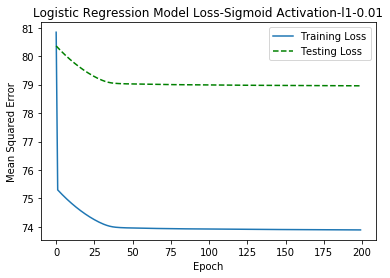

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,4))
# # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], 'g--')
plt.title('Logistic Regression Model Loss-Sigmoid Activation-l1-0.01')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')
print "Loss after final iteration: ", history.history['val_loss'][-1]
plt.show()

In [27]:
import numpy as np 
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix 

predicted_all = model.predict_classes(X_test_std) 
print("predicted classes: {}".format(predicted_all)) 

print('accuracy', accuracy_score(predicted_all, y_test)) 
confusion_mat = confusion_matrix(predicted_all, y_test) 
print("confusion matrix\n{}\n\n".format(confusion_mat)) 
 
print(classification_report(predicted_all, y_test)) 

predicted classes: [[1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]]
('accuracy', 0.0)
confusion matrix
[[ 0  0  0  1  1  0]
 [ 0  0  3  0 17  9]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]]


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00        29
           4       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0

   micro avg       0.00      0.00      0.00        31
   macro avg       0.00      0.00      0.00        31
weighted avg       0.00      0.00      0.00        31



In [28]:
%%time
# Stochastic Logistic Regression 
model = Sequential() 

# validation loss 
model.add(Dense(output_dim=12, input_shape=[X_train_std.shape[1]], 
                activation='sigmoid', W_regularizer=l1(0.01))) 
# compile model 
sgd = SGD(lr=0.1) 
model.compile(loss='categorical_crossentropy', optimizer=sgd) 

# show a summary 
model.summary()

C:\Users\m\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", input_shape=[5871L], kernel_regularizer=<keras.reg..., units=12)`
  


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 12)                70464     
Total params: 70,464
Trainable params: 70,464
Non-trainable params: 0
_________________________________________________________________
Wall time: 359 ms


In [29]:
X_test_std.shape

(31L, 5871L)

In [30]:
# Fit the model 
from keras.utils import to_categorical

y_binary2 = to_categorical(y_train)
y_binary1 = to_categorical(y_test)

history = model.fit(X_train_std, y_binary2, batch_size = 256, nb_epoch = 200, verbose=0, 
                    validation_data=(X_test_std,y_binary1))


C:\Users\m\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Loss after final iteration:  2.0833868980407715


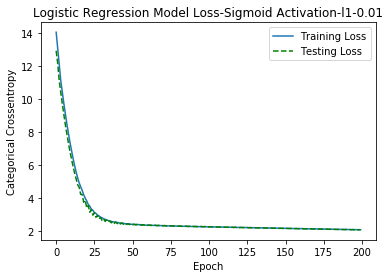

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,4))
# # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], 'g--')
plt.title('Logistic Regression Model Loss-Sigmoid Activation-l1-0.01')
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')
print "Loss after final iteration: ", history.history['val_loss'][-1]
plt.show()

In [32]:
import numpy as np 
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix 

predicted_all = model.predict_classes(X_test_std) 
print("predicted classes: {}".format(predicted_all)) 

print('accuracy', accuracy_score(predicted_all, y_test)) 
confusion_mat = confusion_matrix(predicted_all, y_test) 
print("confusion matrix\n{}\n\n".format(confusion_mat)) 
 
print(classification_report(predicted_all, y_test)) 

predicted classes: [11  3 10 10 11 11 11 10 10 11 10 10 11  0 11 11 11 10 10 10 10 11  0 10
 11 10  0 10 10 10 11]
('accuracy', 0.7741935483870968)
confusion matrix
[[ 0  0  3  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0 15  0]
 [ 0  0  0  0  3  9]]


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
          10       0.83      1.00      0.91        15
          11       1.00      0.75      0.86        12

   micro avg       0.77      0.77      0.77        31
   macro avg       0.31      0.29      0.29        31
weighted avg       0.79      0.77      0.77        31



In [33]:
%%time
# Stochastic Logistic Regression 
model = Sequential() 

# validation loss 
model.add(Dense(output_dim=12, input_shape=[X_train_std.shape[1]], 
                activation='sigmoid', W_regularizer=l2(0.01))) 
# compile model 
sgd = SGD(lr=0.1) 
model.compile(loss='categorical_crossentropy', optimizer=sgd) 

# show a summary 
model.summary()

C:\Users\m\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", input_shape=[5871L], kernel_regularizer=<keras.reg..., units=12)`
  


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 12)                70464     
Total params: 70,464
Trainable params: 70,464
Non-trainable params: 0
_________________________________________________________________
Wall time: 328 ms


In [34]:
# Fit the model 
from keras.utils import to_categorical

y_binary2 = to_categorical(y_train)
y_binary1 = to_categorical(y_test)

history = model.fit(X_train_std, y_binary2, batch_size = 256, nb_epoch = 200, verbose=0, 
                    validation_data=(X_test_std,y_binary1))

C:\Users\m\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Loss after final iteration:  0.7502277493476868


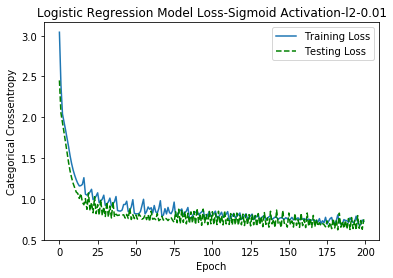

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,4))
# # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], 'g--')
plt.title('Logistic Regression Model Loss-Sigmoid Activation-l2-0.01')
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')
print "Loss after final iteration: ", history.history['val_loss'][-1]
plt.show()

In [36]:
import numpy as np 
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix 


predicted_all = model.predict_classes(X_test_std) 
print("predicted classes: {}".format(predicted_all)) 

print('accuracy', accuracy_score(predicted_all, y_test)) 
confusion_mat = confusion_matrix(predicted_all, y_test) 
print("confusion matrix\n{}\n\n".format(confusion_mat)) 
 
print(classification_report(predicted_all, y_test)) 

predicted classes: [10  0 10 10 11 11 11 10 10 11 10 10 10  1 11 11 11 10 10 10 10 11  1 10
 11 10  1 10 10  0 11]
('accuracy', 0.7419354838709677)
confusion matrix
[[ 0  0  0  1  1  0]
 [ 0  0  3  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0 15  1]
 [ 0  0  0  0  2  8]]


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
          10       0.83      0.94      0.88        16
          11       0.89      0.80      0.84        10

   micro avg       0.74      0.74      0.74        31
   macro avg       0.29      0.29      0.29        31
weighted avg       0.72      0.74      0.73        31



In [37]:
%%time
# Stochastic Logistic Regression 
model = Sequential() 

# validation loss 
model.add(Dense(output_dim=12, input_shape=[X_train_std.shape[1]], 
                activation='relu', W_regularizer=l2(0.01))) 
# compile model 
sgd = SGD(lr=0.1) 
model.compile(loss='categorical_crossentropy', optimizer=sgd) 

# show a summary 
model.summary()

C:\Users\m\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_shape=[5871L], kernel_regularizer=<keras.reg..., units=12)`
  


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 12)                70464     
Total params: 70,464
Trainable params: 70,464
Non-trainable params: 0
_________________________________________________________________
Wall time: 360 ms


In [38]:
# Fit the model 
from keras.utils import to_categorical

y_binary2 = to_categorical(y_train)
y_binary1 = to_categorical(y_test)

history = model.fit(X_train_std, y_binary2, batch_size = 100, nb_epoch = 200, verbose=2, 
                    validation_data=(X_test_std,y_binary1))

C:\Users\m\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 122 samples, validate on 31 samples
Epoch 1/200
 - 0s - loss: 26.3342 - val_loss: 96.8759
Epoch 2/200
 - 0s - loss: 98.0726 - val_loss: 96.0821
Epoch 3/200
 - 0s - loss: 96.9467 - val_loss: 95.4353
Epoch 4/200
 - 0s - loss: 96.0712 - val_loss: 94.6712
Epoch 5/200
 - 0s - loss: 95.3011 - val_loss: 93.9207
Epoch 6/200
 - 0s - loss: 94.5410 - val_loss: 93.1688
Epoch 7/200
 - 0s - loss: 93.7882 - val_loss: 92.4305
Epoch 8/200
 - 0s - loss: 93.0440 - val_loss: 91.6999
Epoch 9/200
 - 0s - loss: 92.3081 - val_loss: 90.9852
Epoch 10/200
 - 0s - loss: 91.5767 - val_loss: 90.2617
Epoch 11/200
 - 0s - loss: 90.8509 - val_loss: 89.5551
Epoch 12/200
 - 0s - loss: 90.1336 - val_loss: 88.8724
Epoch 13/200
 - 0s - loss: 89.2175 - val_loss: 88.1892
Epoch 14/200
 - 0s - loss: 88.4400 - val_loss: 87.5063
Epoch 15/200
 - 0s - loss: 87.7422 - val_loss: 86.8350
Epoch 16/200
 - 0s - loss: 87.0517 - val_loss: 86.1485
Epoch 17/200
 - 0s - loss: 86.3670 - val_loss: 85.4665
Epoch 18/200
 - 0s - loss: 85

Epoch 149/200
 - 0s - loss: 31.2072 - val_loss: 30.7288
Epoch 150/200
 - 0s - loss: 30.9730 - val_loss: 30.4933
Epoch 151/200
 - 0s - loss: 30.7407 - val_loss: 30.2622
Epoch 152/200
 - 0s - loss: 30.5102 - val_loss: 30.0338
Epoch 153/200
 - 0s - loss: 30.2817 - val_loss: 29.8067
Epoch 154/200
 - 0s - loss: 30.0547 - val_loss: 29.5819
Epoch 155/200
 - 0s - loss: 29.8299 - val_loss: 29.3583
Epoch 156/200
 - 0s - loss: 29.6066 - val_loss: 29.1370
Epoch 157/200
 - 0s - loss: 29.3851 - val_loss: 28.9166
Epoch 158/200
 - 0s - loss: 29.1653 - val_loss: 28.6979
Epoch 159/200
 - 0s - loss: 28.9472 - val_loss: 28.4815
Epoch 160/200
 - 0s - loss: 28.7306 - val_loss: 28.2655
Epoch 161/200
 - 0s - loss: 28.5161 - val_loss: 28.0529
Epoch 162/200
 - 0s - loss: 28.3035 - val_loss: 27.8422
Epoch 163/200
 - 0s - loss: 28.0928 - val_loss: 27.6331
Epoch 164/200
 - 0s - loss: 27.8836 - val_loss: 27.4253
Epoch 165/200
 - 0s - loss: 27.6760 - val_loss: 27.2194
Epoch 166/200
 - 0s - loss: 27.4699 - val_loss: 

Loss after final iteration:  20.95134925842285


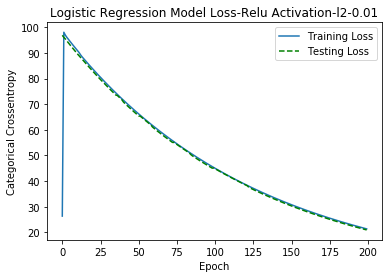

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,4))
# # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], 'g--')
plt.title('Logistic Regression Model Loss-Relu Activation-l2-0.01')
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')
print "Loss after final iteration: ", history.history['val_loss'][-1]
plt.show()

In [40]:
import numpy as np 
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix 

predicted_all = model.predict_classes(X_test_std) 
print("predicted classes: {}".format(predicted_all)) 

print('accuracy', accuracy_score(predicted_all, y_test)) 
confusion_mat = confusion_matrix(predicted_all, y_test) 
print("confusion matrix\n{}\n\n".format(confusion_mat)) 
 
print(classification_report(predicted_all, y_test)) 

predicted classes: [10  5 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10  7 10]
('accuracy', 0.5483870967741935)
confusion matrix
[[ 0  0  0  0  0  0]
 [ 0  0  1  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  1  0]
 [ 3  0  0  0 17  9]
 [ 0  0  0  0  0  0]]


              precision    recall  f1-score   support

           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         1
          10       0.94      0.59      0.72        29
          11       0.00      0.00      0.00         0

   micro avg       0.55      0.55      0.55        31
   macro avg       0.16      0.10      0.12        31
weighted avg       0.88      0.55      0.68        31



The above relu-rectified linear unit activation of logistic regression has nan as loss when the training loss is higher than the testing loss

### Try out a few Multilayer Perceptrons 
using the best performers, sigmoid, categorical crossentropy loss, and l1  and l2 regulation


In [71]:
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Activation 
from keras.regularizers import l2, l1 
from keras.optimizers import SGD


In [72]:
%%time
# Stochastic Logistic Regression 
model = Sequential() 

# validation loss 

model.add(Dense(output_dim=12, input_shape=[X_train_scaled.shape[1]], 
                activation='sigmoid', W_regularizer=l2(0.001)))
model.add(Dense(output_dim=12, activation='sigmoid'))
model.add(Dense(output_dim=12, activation='sigmoid'))


# compile model 
sgd = SGD(lr=0.1) 
model.compile(loss='categorical_crossentropy', optimizer=sgd) 

# show a summary 
model.summary()

C:\Users\m\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", input_shape=[5871L], kernel_regularizer=<keras.reg..., units=12)`
  import sys
C:\Users\m\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=12, activation="sigmoid")`
  
C:\Users\m\Anaconda2\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=12, activation="sigmoid")`
  if __name__ == '__main__':


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 12)                70464     
_________________________________________________________________
dense_19 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_20 (Dense)             (None, 12)                156       
Total params: 70,776
Trainable params: 70,776
Non-trainable params: 0
_________________________________________________________________
Wall time: 766 ms


In [73]:
# Fit the model 
from keras.utils import to_categorical

y_binary2 = to_categorical(y_train)
y_binary1 = to_categorical(y_test)

history = model.fit(X_train_std, y_binary2, batch_size = 100, nb_epoch = 200, verbose=2, 
                    validation_data=(X_test_std,y_binary1))

C:\Users\m\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 122 samples, validate on 31 samples
Epoch 1/200
 - 0s - loss: 2.5061 - val_loss: 2.4670
Epoch 2/200
 - 0s - loss: 2.4515 - val_loss: 2.4160
Epoch 3/200
 - 0s - loss: 2.4061 - val_loss: 2.3759
Epoch 4/200
 - 0s - loss: 2.3689 - val_loss: 2.3386
Epoch 5/200
 - 0s - loss: 2.3341 - val_loss: 2.3055
Epoch 6/200
 - 0s - loss: 2.3029 - val_loss: 2.2740
Epoch 7/200
 - 0s - loss: 2.2753 - val_loss: 2.2446
Epoch 8/200
 - 0s - loss: 2.2491 - val_loss: 2.2203
Epoch 9/200
 - 0s - loss: 2.2269 - val_loss: 2.1988
Epoch 10/200
 - 0s - loss: 2.2058 - val_loss: 2.1768
Epoch 11/200
 - 0s - loss: 2.1859 - val_loss: 2.1577
Epoch 12/200
 - 0s - loss: 2.1673 - val_loss: 2.1370
Epoch 13/200
 - 0s - loss: 2.1489 - val_loss: 2.1193
Epoch 14/200
 - 0s - loss: 2.1326 - val_loss: 2.1018
Epoch 15/200
 - 0s - loss: 2.1159 - val_loss: 2.0846
Epoch 16/200
 - 0s - loss: 2.0997 - val_loss: 2.0661
Epoch 17/200
 - 0s - loss: 2.0833 - val_loss: 2.0492
Epoch 18/200
 - 0s - loss: 2.0682 - val_loss: 2.0341
Epoch 19/2

Epoch 154/200
 - 0s - loss: 1.3628 - val_loss: 1.1959
Epoch 155/200
 - 0s - loss: 1.3612 - val_loss: 1.1943
Epoch 156/200
 - 0s - loss: 1.3596 - val_loss: 1.1931
Epoch 157/200
 - 0s - loss: 1.3581 - val_loss: 1.1921
Epoch 158/200
 - 0s - loss: 1.3564 - val_loss: 1.1908
Epoch 159/200
 - 0s - loss: 1.3548 - val_loss: 1.1889
Epoch 160/200
 - 0s - loss: 1.3533 - val_loss: 1.1877
Epoch 161/200
 - 0s - loss: 1.3517 - val_loss: 1.1866
Epoch 162/200
 - 0s - loss: 1.3502 - val_loss: 1.1859
Epoch 163/200
 - 0s - loss: 1.3486 - val_loss: 1.1832
Epoch 164/200
 - 0s - loss: 1.3472 - val_loss: 1.1825
Epoch 165/200
 - 0s - loss: 1.3455 - val_loss: 1.1807
Epoch 166/200
 - 0s - loss: 1.3441 - val_loss: 1.1791
Epoch 167/200
 - 0s - loss: 1.3426 - val_loss: 1.1781
Epoch 168/200
 - 0s - loss: 1.3412 - val_loss: 1.1779
Epoch 169/200
 - 0s - loss: 1.3397 - val_loss: 1.1767
Epoch 170/200
 - 0s - loss: 1.3382 - val_loss: 1.1749
Epoch 171/200
 - 0s - loss: 1.3368 - val_loss: 1.1733
Epoch 172/200
 - 0s - loss: 

In [74]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,4))
# # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], 'g--')
plt.title('MLP Model Loss-3 Layer Sigmoid Activation-l2-0.01')
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')
print "Loss after final iteration: ", history.history['val_loss'][-1]
plt.show()

Loss after final iteration:  1.136497974395752


In [75]:
import numpy as np 
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix 

predicted_all = model.predict_classes(X_test_std) 
print("predicted classes: {}".format(predicted_all)) 

print('accuracy', accuracy_score(predicted_all, y_test)) 
confusion_mat = confusion_matrix(predicted_all, y_test) 
print("confusion matrix\n{}\n\n".format(confusion_mat)) 
 
print(classification_report(predicted_all, y_test)) 

predicted classes: [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10]
('accuracy', 0.5806451612903226)
confusion matrix
[[ 0  0  0  0]
 [ 0  0  0  0]
 [ 3  1 18  9]
 [ 0  0  0  0]]


              precision    recall  f1-score   support

           4       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
          10       1.00      0.58      0.73        31
          11       0.00      0.00      0.00         0

   micro avg       0.58      0.58      0.58        31
   macro avg       0.25      0.15      0.18        31
weighted avg       1.00      0.58      0.73        31



In [76]:
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Activation 
from keras.regularizers import l2, l1 
from keras.optimizers import SGD

In [77]:
%%time
# Stochastic Logistic Regression 
model = Sequential() 

# validation loss 

model.add(Dense(output_dim=12, input_shape=[X_train_scaled.shape[1]], 
                activation='sigmoid', W_regularizer=l1(0.001)))
model.add(Dense(output_dim=12, activation='sigmoid'))
model.add(Dense(output_dim=12, activation='sigmoid'))


# compile model 
sgd = SGD(lr=0.1) 
model.compile(loss='categorical_crossentropy', optimizer=sgd) 

# show a summary 
model.summary()

C:\Users\m\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", input_shape=[5871L], kernel_regularizer=<keras.reg..., units=12)`
  import sys
C:\Users\m\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=12, activation="sigmoid")`
  
C:\Users\m\Anaconda2\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=12, activation="sigmoid")`
  if __name__ == '__main__':


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 12)                70464     
_________________________________________________________________
dense_22 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_23 (Dense)             (None, 12)                156       
Total params: 70,776
Trainable params: 70,776
Non-trainable params: 0
_________________________________________________________________
Wall time: 856 ms


In [78]:
# Fit the model 
from keras.utils import to_categorical

y_binary2 = to_categorical(y_train)
y_binary1 = to_categorical(y_test)

history = model.fit(X_train_std, y_binary2, batch_size = 100, nb_epoch = 200, verbose=2, 
                    validation_data=(X_test_std,y_binary1))

C:\Users\m\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 122 samples, validate on 31 samples
Epoch 1/200
 - 0s - loss: 3.8646 - val_loss: 3.7039
Epoch 2/200
 - 0s - loss: 3.7470 - val_loss: 3.5986
Epoch 3/200
 - 0s - loss: 3.6508 - val_loss: 3.4943
Epoch 4/200
 - 0s - loss: 3.5586 - val_loss: 3.4033
Epoch 5/200
 - 0s - loss: 3.4794 - val_loss: 3.3332
Epoch 6/200
 - 0s - loss: 3.4146 - val_loss: 3.2646
Epoch 7/200
 - 0s - loss: 3.3514 - val_loss: 3.2000
Epoch 8/200
 - 0s - loss: 3.2934 - val_loss: 3.1407
Epoch 9/200
 - 0s - loss: 3.2410 - val_loss: 3.0906
Epoch 10/200
 - 0s - loss: 3.1945 - val_loss: 3.0433
Epoch 11/200
 - 0s - loss: 3.1511 - val_loss: 2.9994
Epoch 12/200
 - 0s - loss: 3.1111 - val_loss: 2.9562
Epoch 13/200
 - 0s - loss: 3.0727 - val_loss: 2.9180
Epoch 14/200
 - 0s - loss: 3.0376 - val_loss: 2.8832
Epoch 15/200
 - 0s - loss: 3.0043 - val_loss: 2.8462
Epoch 16/200
 - 0s - loss: 2.9697 - val_loss: 2.8108
Epoch 17/200
 - 0s - loss: 2.9372 - val_loss: 2.7776
Epoch 18/200
 - 0s - loss: 2.9060 - val_loss: 2.7446
Epoch 19/2

Epoch 154/200
 - 0s - loss: 1.4002 - val_loss: 1.2413
Epoch 155/200
 - 0s - loss: 1.3991 - val_loss: 1.2374
Epoch 156/200
 - 0s - loss: 1.3961 - val_loss: 1.2388
Epoch 157/200
 - 0s - loss: 1.3950 - val_loss: 1.2365
Epoch 158/200
 - 0s - loss: 1.3927 - val_loss: 1.2340
Epoch 159/200
 - 0s - loss: 1.3905 - val_loss: 1.2334
Epoch 160/200
 - 0s - loss: 1.3896 - val_loss: 1.2346
Epoch 161/200
 - 0s - loss: 1.3878 - val_loss: 1.2327
Epoch 162/200
 - 0s - loss: 1.3852 - val_loss: 1.2317
Epoch 163/200
 - 0s - loss: 1.3834 - val_loss: 1.2312
Epoch 164/200
 - 0s - loss: 1.3823 - val_loss: 1.2283
Epoch 165/200
 - 0s - loss: 1.3801 - val_loss: 1.2254
Epoch 166/200
 - 0s - loss: 1.3781 - val_loss: 1.2243
Epoch 167/200
 - 0s - loss: 1.3765 - val_loss: 1.2231
Epoch 168/200
 - 0s - loss: 1.3752 - val_loss: 1.2209
Epoch 169/200
 - 0s - loss: 1.3734 - val_loss: 1.2185
Epoch 170/200
 - 0s - loss: 1.3715 - val_loss: 1.2165
Epoch 171/200
 - 0s - loss: 1.3704 - val_loss: 1.2162
Epoch 172/200
 - 0s - loss: 

Loss after final iteration:  1.1802889108657837


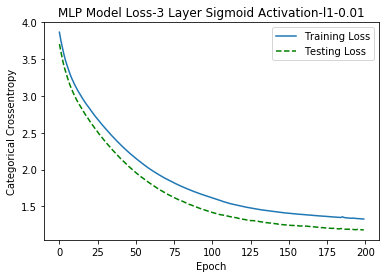

In [79]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,4))
# # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], 'g--')
plt.title('MLP Model Loss-3 Layer Sigmoid Activation-l1-0.01')
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')
print "Loss after final iteration: ", history.history['val_loss'][-1]
plt.show()

In [80]:
import numpy as np 
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix 

predicted_all = model.predict_classes(X_test_std) 
print("predicted classes: {}".format(predicted_all)) 

print('accuracy', accuracy_score(predicted_all, y_test)) 
confusion_mat = confusion_matrix(predicted_all, y_test) 
print("confusion matrix\n{}\n\n".format(confusion_mat)) 
 
print(classification_report(predicted_all, y_test)) 

predicted classes: [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10]
('accuracy', 0.5806451612903226)
confusion matrix
[[ 0  0  0  0]
 [ 0  0  0  0]
 [ 3  1 18  9]
 [ 0  0  0  0]]


              precision    recall  f1-score   support

           4       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
          10       1.00      0.58      0.73        31
          11       0.00      0.00      0.00         0

   micro avg       0.58      0.58      0.58        31
   macro avg       0.25      0.15      0.18        31
weighted avg       1.00      0.58      0.73        31



### MLP with 3 Relu activation layers and l2 regulation

In [95]:
%%time
# Stochastic Logistic Regression 
model = Sequential() 

# validation loss 

model.add(Dense(output_dim=12, input_shape=[X_train_scaled.shape[1]], 
                activation='relu', W_regularizer=l2(0.001)))
model.add(Dense(output_dim=12, activation='relu'))
model.add(Dense(output_dim=12, activation='relu'))


# compile model 
sgd = SGD(lr=0.1) 
model.compile(loss='categorical_crossentropy', optimizer=sgd) 

# show a summary 
model.summary()

C:\Users\m\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_shape=[5871L], kernel_regularizer=<keras.reg..., units=12)`
  import sys
C:\Users\m\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=12, activation="relu")`
  
C:\Users\m\Anaconda2\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=12, activation="relu")`
  if __name__ == '__main__':


Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 12)                70464     
_________________________________________________________________
dense_28 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_29 (Dense)             (None, 12)                156       
Total params: 70,776
Trainable params: 70,776
Non-trainable params: 0
_________________________________________________________________
Wall time: 1.11 s


In [96]:
# Fit the model 
from keras.utils import to_categorical

y_binary2 = to_categorical(y_train)
y_binary1 = to_categorical(y_test)

history = model.fit(X_train_std, y_binary2, batch_size = 100, nb_epoch = 200, verbose=2, 
                    validation_data=(X_test_std,y_binary1))

C:\Users\m\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 122 samples, validate on 31 samples
Epoch 1/200
 - 0s - loss: 4.7787 - val_loss: 1.8452
Epoch 2/200
 - 0s - loss: 3.4235 - val_loss: 1.6770
Epoch 3/200
 - 0s - loss: 3.2655 - val_loss: 1.3105
Epoch 4/200
 - 0s - loss: 3.1460 - val_loss: 1.3615
Epoch 5/200
 - 0s - loss: 3.0446 - val_loss: 1.2033
Epoch 6/200
 - 0s - loss: 2.8791 - val_loss: 1.0996
Epoch 7/200
 - 0s - loss: 3.1356 - val_loss: 1.0532
Epoch 8/200
 - 0s - loss: 3.0972 - val_loss: 1.0081
Epoch 9/200
 - 0s - loss: 3.0510 - val_loss: 1.0500
Epoch 10/200
 - 0s - loss: 3.0311 - val_loss: 5.2009
Epoch 11/200
 - 0s - loss: 4.9965 - val_loss: 0.9306
Epoch 12/200
 - 0s - loss: 2.8616 - val_loss: 1.2413
Epoch 13/200
 - 0s - loss: 2.8397 - val_loss: 1.0704
Epoch 14/200
 - 0s - loss: 2.7052 - val_loss: 1.0238
Epoch 15/200
 - 0s - loss: 2.6745 - val_loss: 1.4676
Epoch 16/200
 - 0s - loss: 2.7397 - val_loss: 1.0764
Epoch 17/200
 - 0s - loss: 2.5988 - val_loss: 1.2477
Epoch 18/200
 - 0s - loss: 3.9199 - val_loss: 2.5490
Epoch 19/2

Epoch 169/200
 - 0s - loss: nan - val_loss: nan
Epoch 170/200
 - 0s - loss: nan - val_loss: nan
Epoch 171/200
 - 0s - loss: nan - val_loss: nan
Epoch 172/200
 - 0s - loss: nan - val_loss: nan
Epoch 173/200
 - 0s - loss: nan - val_loss: nan
Epoch 174/200
 - 0s - loss: nan - val_loss: nan
Epoch 175/200
 - 0s - loss: nan - val_loss: nan
Epoch 176/200
 - 0s - loss: nan - val_loss: nan
Epoch 177/200
 - 0s - loss: nan - val_loss: nan
Epoch 178/200
 - 0s - loss: nan - val_loss: nan
Epoch 179/200
 - 0s - loss: nan - val_loss: nan
Epoch 180/200
 - 0s - loss: nan - val_loss: nan
Epoch 181/200
 - 0s - loss: nan - val_loss: nan
Epoch 182/200
 - 0s - loss: nan - val_loss: nan
Epoch 183/200
 - 0s - loss: nan - val_loss: nan
Epoch 184/200
 - 0s - loss: nan - val_loss: nan
Epoch 185/200
 - 0s - loss: nan - val_loss: nan
Epoch 186/200
 - 0s - loss: nan - val_loss: nan
Epoch 187/200
 - 0s - loss: nan - val_loss: nan
Epoch 188/200
 - 0s - loss: nan - val_loss: nan
Epoch 189/200
 - 0s - loss: nan - val_lo

Loss after final iteration:  nan


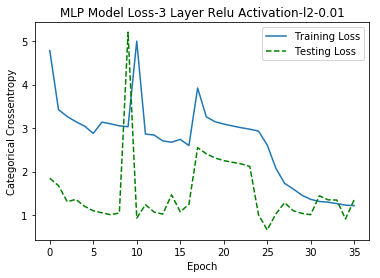

In [97]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,4))
# # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], 'g--')
plt.title('MLP Model Loss-3 Layer Relu Activation-l2-0.01')
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')
print "Loss after final iteration: ", history.history['val_loss'][-1]
plt.show()

In [98]:
import numpy as np 
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix 

predicted_all = model.predict_classes(X_test_std) 
print("predicted classes: {}".format(predicted_all)) 

print('accuracy', accuracy_score(predicted_all, y_test)) 
confusion_mat = confusion_matrix(predicted_all, y_test) 
print("confusion matrix\n{}\n\n".format(confusion_mat)) 
 
print(classification_report(predicted_all, y_test)) 

predicted classes: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
('accuracy', 0.0)
confusion matrix
[[ 0  3  1 18  9]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]]


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        31
           4       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0

   micro avg       0.00      0.00      0.00        31
   macro avg       0.00      0.00      0.00        31
weighted avg       0.00      0.00      0.00        31



### The above logistic regressions and MLP regressions used all the 5,871 features:

In [85]:
print X_train_std.shape
print X_train_std.shape[1]

(122L, 5871L)
5871


### PCA, takes the two components in this code with the settings=2, to classify data targets

Dimensionality reduction is unsupervised learning using eigenvectors to shift the data set in the direction of greatest variance using eigenvectors and with values set as the magnitude of the eigenvalues. Week 3 slides and jupyter notebook information used.

In [159]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([6.92488019e-01, 1.26726918e-01, 4.66761346e-02, 2.97036960e-02,
       2.51442095e-02, 1.33898219e-02, 1.08216689e-02, 9.78655574e-03,
       7.37943143e-03, 5.94107559e-03, 4.38969992e-03, 3.43469610e-03,
       2.74657560e-03, 1.96819219e-03, 1.78316135e-03, 1.40373420e-03,
       1.25122314e-03, 9.21254603e-04, 8.20610148e-04, 7.70082758e-04,
       6.43676226e-04, 5.95018888e-04, 4.94610286e-04, 4.75753440e-04,
       4.34794260e-04, 4.30885858e-04, 4.05277320e-04, 3.73691215e-04,
       3.43948682e-04, 3.35065059e-04, 3.14547523e-04, 3.09346618e-04,
       2.99099487e-04, 2.69574898e-04, 2.61443432e-04, 2.37189590e-04,
       2.31124112e-04, 2.14921135e-04, 2.11401103e-04, 2.04924176e-04,
       1.94592147e-04, 1.88013653e-04, 1.79867057e-04, 1.74362338e-04,
       1.68254208e-04, 1.64014534e-04, 1.54109645e-04, 1.47230354e-04,
       1.44913895e-04, 1.40507913e-04, 1.35798283e-04, 1.33892286e-04,
       1.29242194e-04, 1.25380110e-04, 1.20923882e-04, 1.16650411e-04,
      

In [160]:
print X_train_std.shape
print y_train.shape
print X_train_pca.shape

(122L, 5871L)
(122L,)
(122L, 122L)


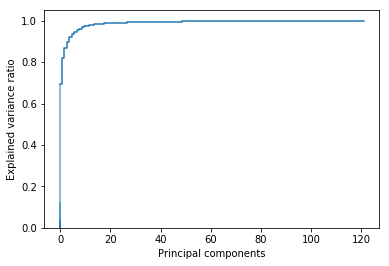

In [161]:
plt.bar(range(1), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(0,122), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

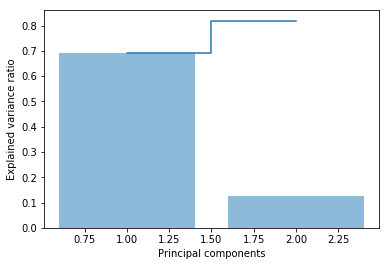

In [189]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1,len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [162]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

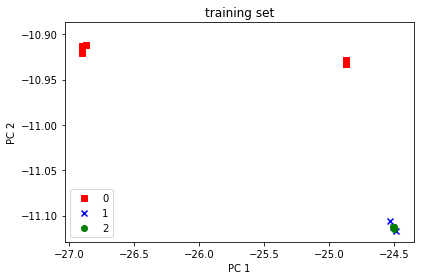

In [163]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], 
                X_train_pca[y_train == l, 1], 
                c=c, label=l, marker=m)
plt.title('training set')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

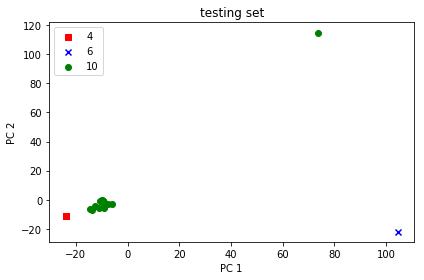

In [164]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_test), colors, markers):
    plt.scatter(X_test_pca[y_test == l, 0], 
                X_test_pca[y_test == l, 1], 
                c=c, label=l, marker=m)
plt.title('testing set')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()



### KNN classification on dataset using Backward Selection
A supervised, lazy learner, instance-based learning model
that is appropriate for this data set to classify the instance type of each observation
Very slow, as in more than one hour to run this code.

In [8]:
# use the same one-hot encoded df above

X = df.iloc[:, 1:].values # returns array of all instances of the Type field
y = df.iloc[:, 0] .values # returns array of all instances of 
#y = np.where(y=='uterine healthy tissue',0,1) # gives all entries 0 if equal to 'uterine ...' and 1 otherwise
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [9]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [10]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

### KNN never stops running on this dataset using the following cell to run, it ran for hours without converging

In [ ]:
%%time
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()#n_neighbors=1)

# selecting features
sbs = SBS(knn)#, k_features=50)
sbs.fit(X_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
# plt.savefig('./sbs.png', dpi=300)
plt.show()

### Try to reduce dimensions first, using PCA, then run KNN

### Principal Component Analysis then KNN 
Dimensionality reduction is unsupervised learning
using eigenvectors to shift the data set
in the direction of greatest variance using eigenvectors and with values
set as the magnitude of the eigenvalues. Week 3 slides and jupyter notebook information used.

In [11]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.fit_transform(X_test_std)
pca.explained_variance_ratio_

array([5.69105297e-01, 2.71497678e-01, 7.10425102e-02, 2.26028796e-02,
       1.19756012e-02, 8.57047132e-03, 6.22141127e-03, 5.41735124e-03,
       4.99312276e-03, 3.12070415e-03, 2.85852471e-03, 2.76709133e-03,
       2.18459954e-03, 2.00097251e-03, 1.90043155e-03, 1.78450059e-03,
       1.54191344e-03, 1.33582336e-03, 1.23350536e-03, 1.14682250e-03,
       1.10724006e-03, 1.00369545e-03, 9.41415331e-04, 9.26454823e-04,
       7.72489416e-04, 7.45633617e-04, 6.56272330e-04, 5.43826851e-04,
       1.60263692e-06, 1.57591571e-07, 1.12236230e-31])

In [12]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_std,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [13]:
y_pred = knn.predict(X_test_std)

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, y_pred)
print cm
print 'Accuracy: ',accuracy_score(y_test, y_pred)


[[ 3  0  0  0]
 [ 0  0  1  0]
 [ 0  0 12  6]
 [ 0  0  0  9]]
Accuracy:  0.7741935483870968


### Decision Trees
Week 7 ipython notebook file

In [176]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, tree
from sklearn.metrics import classification_report, confusion_matrix



In [177]:
# use the same one-hot encoded df above

X = df.iloc[:, 1:].values # returns array of all instances of the Type field
y = df.iloc[:, 0] .values # returns array of all instances of the target
#y = np.where(y=='uterine healthy tissue',0,1) # gives all entries 0 if equal to 'uterine ...' and 1 otherwise
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [178]:
dtc = tree.DecisionTreeClassifier(criterion='entropy')#, max_depth=3)
dtc.fit(X_train, y_train)
predicted = dtc.predict(X_test)

print "Decision Tree Results\nConfusion Matrix: "
print confusion_matrix(y_test,predicted)
print "\n Classifcation Report"
print classification_report(y_test,predicted)

Decision Tree Results
Confusion Matrix: 
[[ 3  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  1  0  0  0]
 [ 0  0  0 16  2]
 [ 0  0  0  3  6]]

 Classifcation Report
              precision    recall  f1-score   support

           4       1.00      1.00      1.00         3
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         1
          10       0.84      0.89      0.86        18
          11       0.75      0.67      0.71         9

   micro avg       0.81      0.81      0.81        31
   macro avg       0.52      0.51      0.51        31
weighted avg       0.80      0.81      0.80        31



### Decision Tree Regression

In [179]:
#Week 7 ipynb

%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split



In [180]:
import random #keep the same results when running the code, as results vary with each run of code
random.seed(100)

In [181]:
# Fit regression model

regr_1 = tree.DecisionTreeRegressor(max_depth=2)
regr_2 = tree.DecisionTreeRegressor(max_depth=5)
regr_3 = tree.DecisionTreeRegressor(max_depth=10)
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)
regr_3.fit(X_train, y_train)

# Predict
#X_test = np.arange(0.0, 300, 0.1)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)

In [182]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, tree
from sklearn.metrics import classification_report, confusion_matrix



In [95]:
print "Decision Tree Regression Prediction with Max Depth=2" 
print y_1.round()
print "\nActual Testing Subset Categorical Values:"
print y_test

print "\nDecision Tree Results Max Depth=2\nConfusion Matrix: "
print confusion_matrix(y_test,y_1.round())
print "\n Classifcation Report"
print classification_report(y_test,y_1.round())

a=sum(y_1.round()==y_test)
b= len(y_test)
print 'The number of testing samples:'
print b
print 'The number of correct predictions:'
print a

print y_1.round() == y_test
print "\nAccuracy of Decision Tree with Max Depth=2"
print round(float(a)/float(b),2),"%"


Decision Tree Regression Prediction with Max Depth=2
[10.  8. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.  3. 10. 10. 10. 10.
 10. 10. 10. 10.  3. 10. 10. 10.  3. 10. 10. 10. 10.]

Actual Testing Subset Categorical Values:
[11  6 10 10 11 11 11 10 10 10 10 10 10  4 10 11 11 10 10 10 10 11  4 10
 11 10  4 10 10 10 11]

Decision Tree Results Max Depth=2
Confusion Matrix: 
[[ 0  0  0  0  0  0]
 [ 3  0  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0 18  0]
 [ 0  0  0  0  9  0]]

 Classifcation Report
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         0
         4.0       0.00      0.00      0.00         3
         6.0       0.00      0.00      0.00         1
         8.0       0.00      0.00      0.00         0
        10.0       0.67      1.00      0.80        18
        11.0       0.00      0.00      0.00         9

   micro avg       0.58      0.58      0.58        31
   macro avg       0.11      0.17      0.13

### Recall the class_mapping dictionary object identifies the index with the sample type

In [183]:
print class_mapping

{'breast cancer cells': 1, 'uterine benign tumor': 10, 'pancreas cancer cells': 5, 'glioma stem cells': 4, 'uterine healthy tissue': 11, 'stomach healthy blood': 9, 'acne cell changes': 0, 'stomach cancer blood': 8, 'pancreas down treated': 6, 'colon cancer cell changes': 3, 'breast cancer treated': 2, 'pancreas up treated': 7}


In [184]:
print "Decision Tree Regression Prediction with Max Depth=5" 
print y_2.round()
print "\nActual Testing Subset Categorical Values:"
print y_test

print "\nDecision Tree Results\nConfusion Matrix: "
print confusion_matrix(y_test,y_2.round())
print "\n Classifcation Report"
print classification_report(y_test,y_2.round())

Decision Tree Regression Prediction with Max Depth=5
[10.  7. 10. 10. 11. 11. 11. 10. 10. 11. 10. 10. 11.  4. 10. 11. 11. 10.
 10. 11. 10. 11.  4. 10. 11. 10.  4. 10. 10. 11. 10.]

Actual Testing Subset Categorical Values:
[11  6 10 10 11 11 11 10 10 10 10 10 10  4 10 11 11 10 10 10 10 11  4 10
 11 10  4 10 10 10 11]

Decision Tree Results
Confusion Matrix: 
[[ 3  0  0  0  0]
 [ 0  0  1  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0 14  4]
 [ 0  0  0  2  7]]

 Classifcation Report
              precision    recall  f1-score   support

         4.0       1.00      1.00      1.00         3
         6.0       0.00      0.00      0.00         1
         7.0       0.00      0.00      0.00         0
        10.0       0.88      0.78      0.82        18
        11.0       0.64      0.78      0.70         9

   micro avg       0.77      0.77      0.77        31
   macro avg       0.50      0.51      0.50        31
weighted avg       0.79      0.77      0.78        31



In [185]:
a=sum(y_2.round()==y_test)
b= len(y_test)
print 'The number of testing samples:'
print b
print 'The number of correct predictions:'
print a

print y_2.round() == y_test
print "\nAccuracy of Decision Tree with Max Depth=5"
print round(float(a)/float(b),2),"%"

The number of testing samples:
31
The number of correct predictions:
24
[False False  True  True  True  True  True  True  True False  True  True
 False  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True False False]

Accuracy of Decision Tree with Max Depth=5
0.77 %


### Decision Tree with Max Depth = 5 and Max Depth = 10 produced the same results

In [186]:
print "Decision Tree Regression Prediction with Max Depth=10" 
print y_3.round()
print "\nActual Testing Subset Categorical Values:"
print y_test

print "\nDecision Tree Results\nConfusion Matrix: "
print confusion_matrix(y_test,y_3.round())
print "\n Classifcation Report"
print classification_report(y_test,y_3.round())

a=sum(y_3.round()==y_test)
b= len(y_test)
print 'The number of testing samples:'
print b
print 'The number of correct predictions:'
print a

print y_3.round() == y_test
print "\nAccuracy of Decision Tree with Max Depth=10"
print round(float(a)/float(b),2),"%"

Decision Tree Regression Prediction with Max Depth=10
[10.  9. 10. 10. 11. 11. 11. 10. 10. 11. 10. 10. 11.  4. 10. 11. 11. 10.
 10. 10. 10. 11.  2. 10. 11. 10.  2. 10. 10. 11. 10.]

Actual Testing Subset Categorical Values:
[11  6 10 10 11 11 11 10 10 10 10 10 10  4 10 11 11 10 10 10 10 11  4 10
 11 10  4 10 10 10 11]

Decision Tree Results
Confusion Matrix: 
[[ 0  0  0  0  0  0]
 [ 2  1  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0 15  3]
 [ 0  0  0  0  2  7]]

 Classifcation Report
              precision    recall  f1-score   support

         2.0       0.00      0.00      0.00         0
         4.0       1.00      0.33      0.50         3
         6.0       0.00      0.00      0.00         1
         9.0       0.00      0.00      0.00         0
        10.0       0.88      0.83      0.86        18
        11.0       0.70      0.78      0.74         9

   micro avg       0.74      0.74      0.74        31
   macro avg       0.43      0.32      0.35        31


### Ensemble Trees, Voting Classifier
Week 7 ipynb file
logistic, random forest, and gaussian naive bayes used

In [187]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, X_train_std, y_train, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

C:\Users\m\Anaconda2\lib\site-packages\sklearn\model_selection\_split.py:651: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\m\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\m\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy: 0.85 (+/- 0.07) [Logistic Regression]


C:\Users\m\Anaconda2\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy: 0.80 (+/- 0.09) [Random Forest]
Accuracy: 0.68 (+/- 0.10) [naive Bayes]
Accuracy: 0.83 (+/- 0.08) [Ensemble]


### PCA then K-means UnSupervised classification

In [188]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn import manifold

np.random.seed = 47

In [192]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
pca.explained_variance_ratio_
print X_train_pca.shape

(122L, 122L)


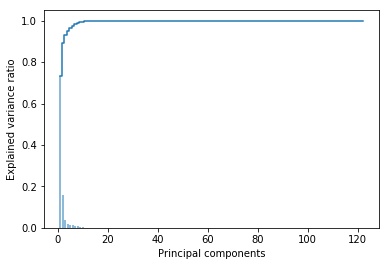

In [193]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1,len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [194]:
n_neighbors = 10
n_components = 2

Wall time: 593 ms


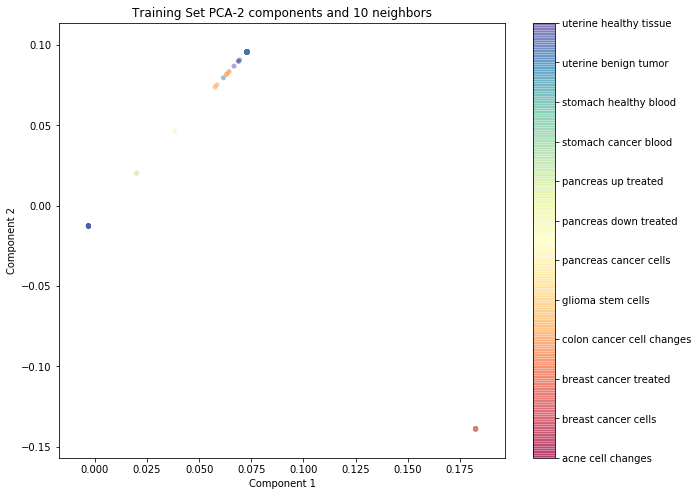

In [207]:
% time Y2 = manifold.LocallyLinearEmbedding(n_neighbors, n_components,\
                                    eigen_solver='auto',\
                                    method='standard').fit_transform(X_train_std)
fig = plt.figure(figsize=[10,8])
axes = fig.add_subplot(1, 1, 1)#, axisbg='black')
plt.ylabel('Component 2')
plt.xlabel('Component 1')
plt.title('Training Set PCA-2 components and 10 neighbors')
plt.scatter(Y2[:, 0], Y2[:, 1], c=y_train, cmap=plt.cm.Spectral,edgecolors='none',s=25,alpha=0.5);
cbar=plt.colorbar()
cbar.set_ticks(list(class_mapping.values()))
cbar.set_ticklabels(list(class_mapping.keys()))

In [209]:
pca = PCA()
X_test_pca = pca.fit_transform(X_test_std)
pca.explained_variance_ratio_
print X_test_pca.shape

(31L, 31L)


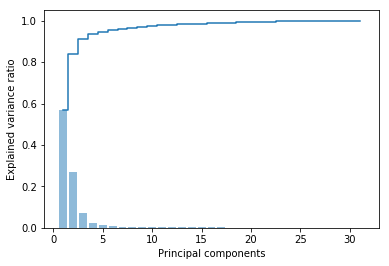

In [210]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1,len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [211]:
n_neighbors = 10
n_components = 2

Wall time: 78 ms


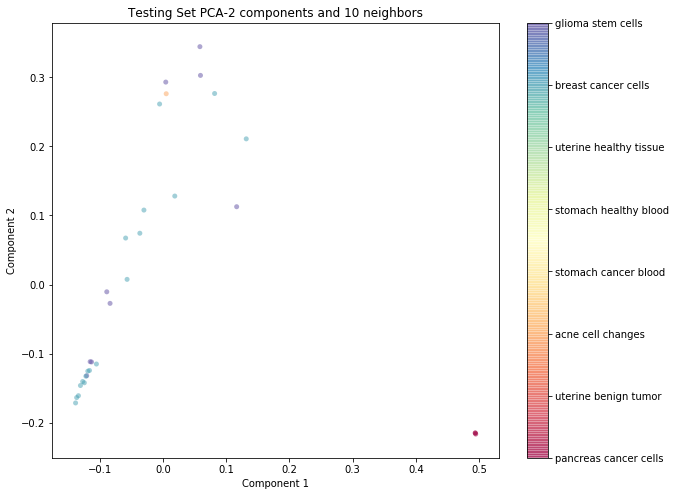

In [214]:
% time Y2 = manifold.LocallyLinearEmbedding(n_neighbors, n_components,\
                                    eigen_solver='auto',\
                                    method='standard').fit_transform(X_test_std)
fig = plt.figure(figsize=[10,8])
axes = fig.add_subplot(1, 1, 1)#, axisbg='black')
plt.ylabel('Component 2')
plt.xlabel('Component 1')
plt.title('Testing Set PCA-2 components and 10 neighbors')
plt.scatter(Y2[:, 0], Y2[:, 1], c=y_test, cmap=plt.cm.Spectral,edgecolors='none',s=25,alpha=0.5);
cbar=plt.colorbar()
cbar.set_ticks(list(class_mapping.values()))
cbar.set_ticklabels(list(class_mapping.keys()))

### K-means

In [202]:
from sklearn.cluster import KMeans
Y = KMeans(n_clusters=2).fit_transform(X_train_std)

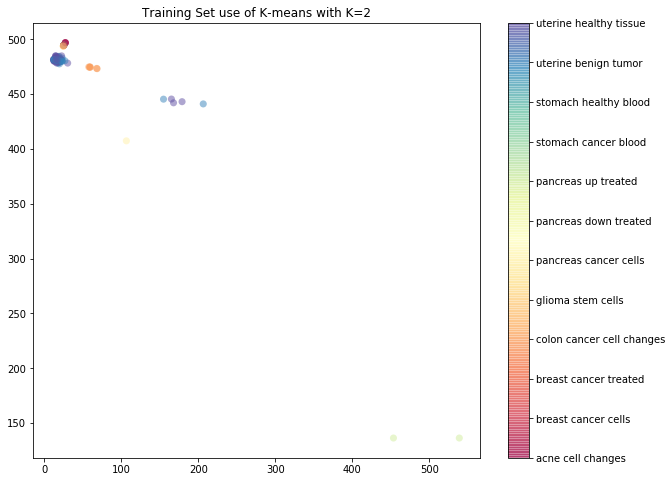

In [208]:
fig = plt.figure(figsize=[10,8])
axes = fig.add_subplot(1, 1, 1)#, axisbg='black')
plt.scatter(Y[:, 0], Y[:, 1], c=y_train, cmap=plt.cm.Spectral,edgecolors='none',s=50,alpha=0.5);
plt.title('Training Set use of K-means with K=2')
cbar=plt.colorbar()
cbar.set_ticks(list(class_mapping.values()))
cbar.set_ticklabels(list(class_mapping.keys()))

In [215]:
Y1 = KMeans(n_clusters=2).fit_transform(X_test_std)

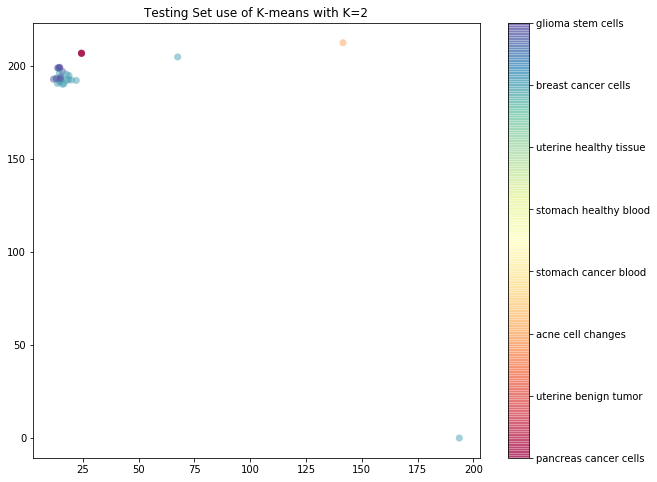

In [216]:
fig = plt.figure(figsize=[10,8])
axes = fig.add_subplot(1, 1, 1)#, axisbg='black')
plt.scatter(Y1[:, 0], Y1[:, 1], c=y_test, cmap=plt.cm.Spectral,edgecolors='none',s=50,alpha=0.5);
plt.title('Testing Set use of K-means with K=2')
cbar=plt.colorbar()
cbar.set_ticks(list(class_mapping.values()))
cbar.set_ticklabels(list(class_mapping.keys()))

### Random Forests

In [223]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

n_estimators_list = [5,10,50,100,200,300,400,1000]

rfc = RandomForestClassifier(random_state=47)
grid = GridSearchCV(estimator=rfc, param_grid=dict(n_estimators=n_estimators_list))
grid.fit(X_train_std, y_train)

print grid
# summarize the results of the grid search
print 'Grid Training Set Best Score: ',grid.best_score_
print 'Grid Training Set Best Number of Trees Estimator: ', grid.best_estimator_.n_estimators

C:\Users\m\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:842: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=47, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [5, 10, 50, 100, 200, 300, 400, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
Grid Training Set Best Score:  0.860655737704918
Grid Training Set Best Number of Trees Estimator:  1000


In [224]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

n_estimators_list = [5,10,50,100,200,300,400,1000]

rfc = RandomForestClassifier(random_state=47)
grid = GridSearchCV(estimator=rfc, param_grid=dict(n_estimators=n_estimators_list))
grid.fit(X_test_std, y_test)

print grid
# summarize the results of the grid search
print 'Grid Testing Set Best Score: ',grid.best_score_
print 'Grid Testing Set Best Number of Trees Estimator: ', grid.best_estimator_.n_estimators

C:\Users\m\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:842: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=47, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [5, 10, 50, 100, 200, 300, 400, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
Grid Testing Set Best Score:  0.7419354838709677
Grid Testing Set Best Number of Trees Estimator:  50
